In [13]:
import pandas as pd
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score
)

# --- 1) Load your CSV ---
csv_path = 'hfd_closed_eyes_ml_results/evaluation_runs_metrics_svm.csv'  # update this
df_raw = pd.read_csv(csv_path)

# --- 2) Drop footer/summaries ---
df = df_raw[pd.to_numeric(df_raw['run'], errors='coerce').notna()].copy()
df['run'] = df['run'].astype(int)

# --- 3) Coerce confusion and AUC columns to numeric ---
cols_to_numeric = [
    'sub_cm00','sub_cm01','sub_cm10','sub_cm11',
    'smp_cm00','smp_cm01','smp_cm10','smp_cm11'
]
df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

# --- 4) Compute metrics using sklearn ---
records = []
for _, row in df.iterrows():
    # Reconstruct subject-level y_true and y_pred
    y_true_subj = [0]*int(row['sub_cm00']) + [0]*int(row['sub_cm01']) + [1]*int(row['sub_cm10']) + [1]*int(row['sub_cm11'])
    y_pred_subj = [0]*int(row['sub_cm00']) + [1]*int(row['sub_cm01']) + [0]*int(row['sub_cm10']) + [1]*int(row['sub_cm11'])

    # Sample-level confusion
    y_true_smpl = [0]*int(row['smp_cm00']) + [0]*int(row['smp_cm01']) + [1]*int(row['smp_cm10']) + [1]*int(row['smp_cm11'])
    y_pred_smpl = [0]*int(row['smp_cm00']) + [1]*int(row['smp_cm01']) + [0]*int(row['smp_cm10']) + [1]*int(row['smp_cm11'])

    # Compute metrics
    sub_precision = precision_score(y_true_subj, y_pred_subj, average='macro', zero_division=0)
    sub_recall    = recall_score(y_true_subj, y_pred_subj, average='macro', zero_division=0)
    sub_f1        = f1_score(y_true_subj, y_pred_subj, average='macro', zero_division=0)
    sub_acc       = accuracy_score(y_true_subj, y_pred_subj)

    smp_auc = roc_auc_score(y_true_smpl, y_pred_smpl)

    records.append({
        'sub_precision_macro': sub_precision,
        'sub_recall_macro':    sub_recall,
        'sub_f1_macro':        sub_f1,
        'sub_accuracy':        sub_acc,
        'smp_auc':             smp_auc
    })

metrics_df = pd.DataFrame(records)

# --- 5) Mean ± std summary ---
summary = metrics_df.agg(['mean', 'std']).T.rename(columns={'mean':'Mean','std':'Std'})

# --- 6) Display the result ---
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Subject Metrics (sklearn) + Sample AUC", dataframe=summary)

metrics_order = [
    'sub_f1_macro',
    'sub_accuracy',
    'sub_precision_macro',
    'sub_recall_macro',
    'smp_auc'
]
labels = ['F1', 'Accuracy', 'Precision', 'Recall', 'AUC']

# 2) build a dict of formatted strings “mean ± std”
row = {}
for key, label in zip(metrics_order, labels):
    mean = summary.loc[key, 'Mean']
    std  = summary.loc[key, 'Std']
    row[label] = f"{mean * 100:.3f} ± {std * 100:.3f}"

# 3a) if you want a nice one‐row DataFrame in your notebook/ACE tools:
import pandas as pd
row_df = pd.DataFrame([row])
import ace_tools_open as tools
tools.display_dataframe_to_user(
    name="Summary Metrics (mean ± std)", 
    dataframe=row_df
)

# 3b) if you just want a one‐line printout in the console:
print(", ".join(f"{label}: {val*100}" for label, val in row.items()))


Subject Metrics (sklearn) + Sample AUC


Summary Metrics (mean ± std)


F1: 35.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035.417 ± 0.00035

In [2]:
!pip install ace_tools



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [19]:
import numpy as np

data = np.load("/home/s.dharia-ra/Shyamal/major_revisions_ASMR/asmr_hfd_features_new_MR/1-epochs-epo_hfd.npz")

features = data["hfd_open"]
features.shape

(18, 31, 5)

In [18]:
data

NpzFile '/home/s.dharia-ra/Shyamal/major_revisions_ASMR/asmr_hfd_features_new_MR/1-epochs-epo_hfd.npz' with keys: hfd_closed, hfd_open, labels, num_samples, num_channels...

Subject-level Confusion Matrix:
[[10.  5.]
 [ 4. 12.]]


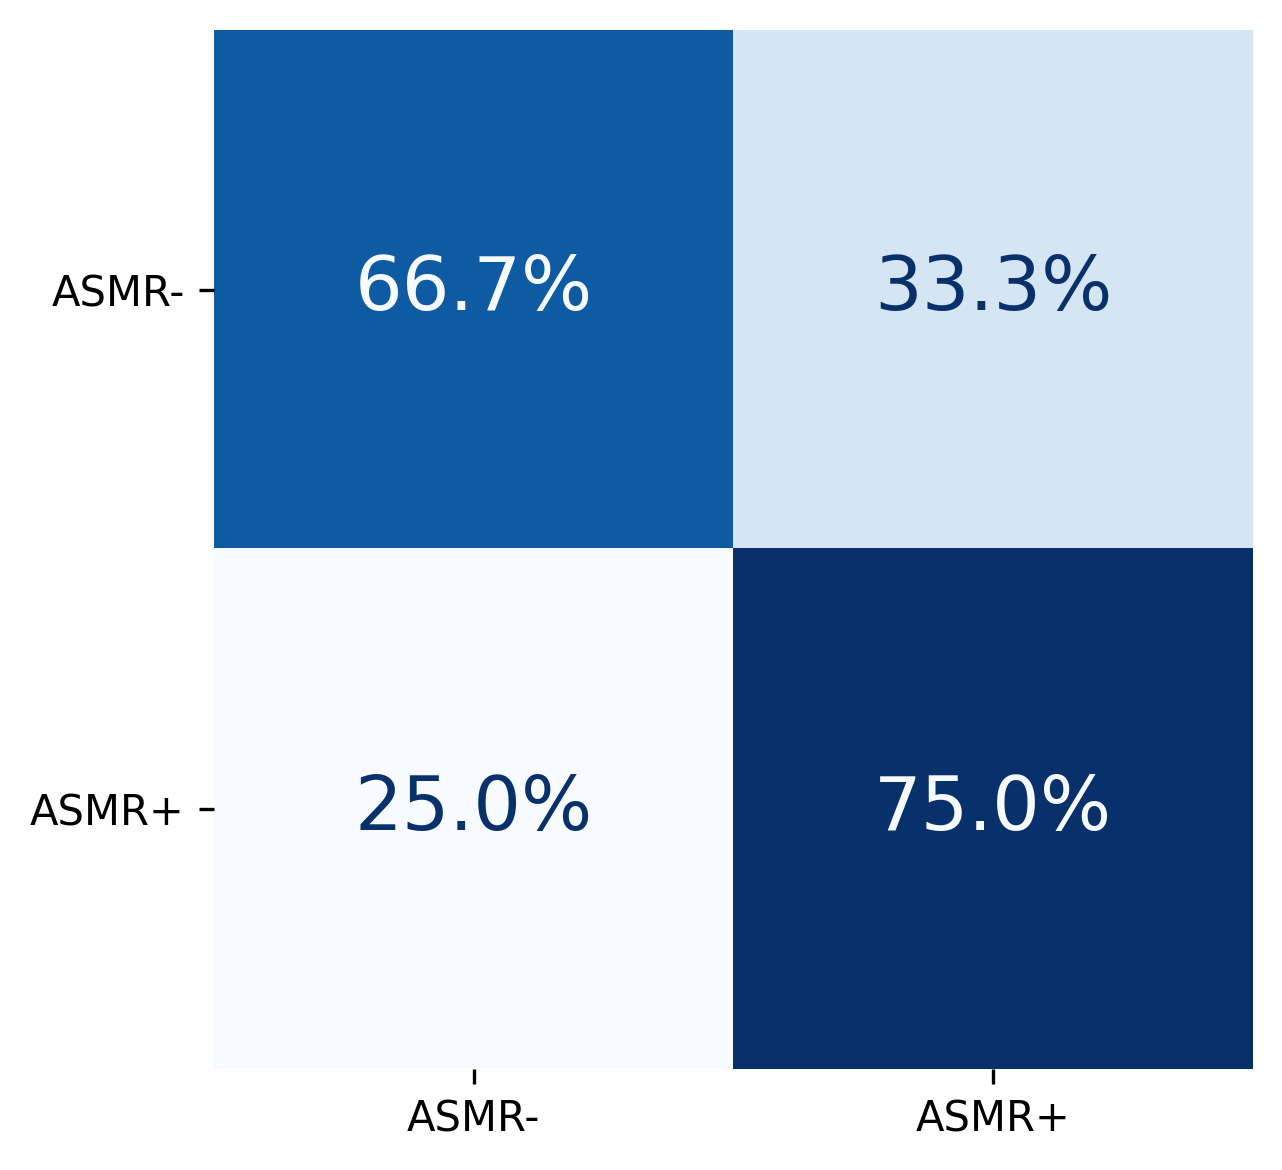


Subject-level Confusion Matrix (Percentages per class):
Control->Control: 66.7%
Control->ASMR: 33.3%
ASMR->Control: 25.0%
ASMR->ASMR: 75.0%


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load your CSV
csv_path = '/home/s.dharia-ra/Shyamal/major_revisions_ASMR/hfd_open_eyes_ml_results/evaluation_runs_metrics_svm.csv'  # Update path as needed
df = pd.read_csv(csv_path)

# Extract the mean row (or you can use individual runs)
mean_row = df[df['run'] == 'mean±std'].iloc[0]

# Extract subject-level confusion matrix values
sub_cm00 = mean_row['sub_cm00']  # Control -> Control
sub_cm01 = mean_row['sub_cm01']  # Control -> ASMR  
sub_cm10 = mean_row['sub_cm10']  # ASMR -> Control
sub_cm11 = mean_row['sub_cm11']  # ASMR -> ASMR

# Create confusion matrix
cm = np.array([[sub_cm00, sub_cm01],
               [sub_cm10, sub_cm11]])

print("Subject-level Confusion Matrix:")
print(cm)

# Convert to percentages per class (row-wise normalization)
cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100

labels = ["ASMR-", "ASMR+"]

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage,
                              display_labels=labels)
disp.plot(cmap="Blues",
          values_format=".1f",
          colorbar=False,
          ax=ax)

# Customize font sizes and add % symbols
for txt in ax.texts:
    txt.set_fontsize(18)
    current_text = txt.get_text()
    txt.set_text(current_text + '%')

# Remove axes
ax.set_xlabel("")
ax.set_ylabel("")
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
fig.savefig("subject_level_cm_percentage.png", bbox_inches="tight", dpi=300)
plt.show()

# Print verification
print("\nSubject-level Confusion Matrix (Percentages per class):")
print(f"Control->Control: {cm_percentage[0,0]:.1f}%")
print(f"Control->ASMR: {cm_percentage[0,1]:.1f}%")
print(f"ASMR->Control: {cm_percentage[1,0]:.1f}%")
print(f"ASMR->ASMR: {cm_percentage[1,1]:.1f}%")

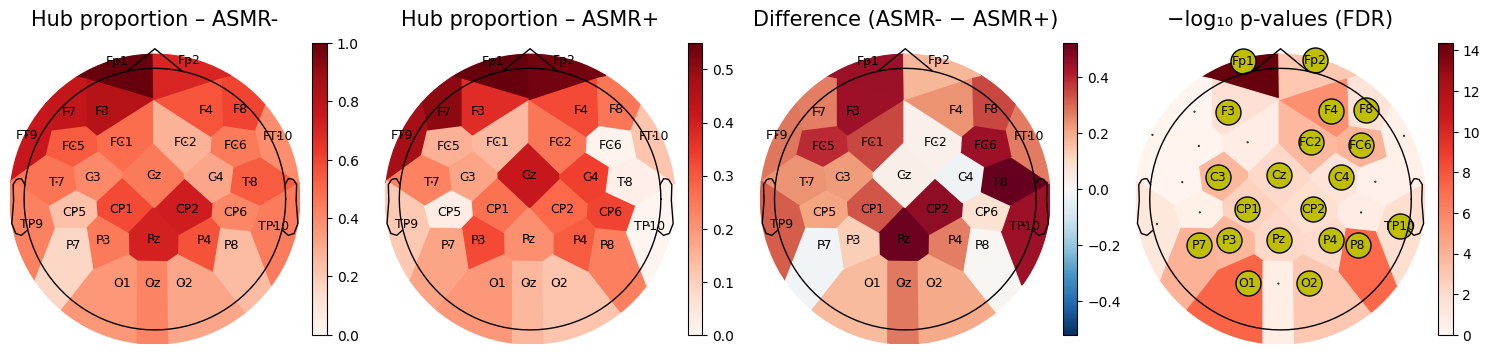

In [29]:
#!/usr/bin/env python3
# ------------------------------------------------------------------
# Three-panel topomap with colour-bars
# ------------------------------------------------------------------
import glob, numpy as np, matplotlib.pyplot as plt, mne
from scipy.stats                 import f_oneway, ranksums, kruskal
from statsmodels.stats.multitest import multipletests
FILE_GLOB  = 'weights_attn/attn_weights_run*_seed*_fold*.npz'
EPOCHS_FIF = 'asmr_epochs/1-epochs-epo.fif'

file_paths = glob.glob(FILE_GLOB)
epochs     = mne.read_epochs(EPOCHS_FIF, verbose=False)

med_0, med_1 = [], []
for fp in file_paths:
    d        = np.load(fp, allow_pickle=True)
    attn     = d['attn_wei']            # (2, trials, ch, ch)
    labels   = d['labels']
    preds    = d['preds']
    mean_att = attn.mean(axis=0)        # average across encoder layers
    corr     = preds == labels
    if (m0 := (corr & (labels == 0))).any():
        med_0.append(np.mean(mean_att[m0], axis=0))
    if (m1 := (corr & (labels == 1))).any():
        med_1.append(np.mean(mean_att[m1], axis=0))

if not med_0 or not med_1:
    raise RuntimeError('Need at least one correctly predicted sample per class.')

conn0, conn1 = np.stack(med_0), np.stack(med_1)

thr0, thr1 = np.nanmedian(conn0) + np.nanstd(conn0), np.nanmedian(conn1) + np.nanstd(conn1)
hub0 = (conn0 > thr0).sum(axis=2) / (conn0.shape[2] - 1)
hub1 = (conn1 > thr1).sum(axis=2) / (conn1.shape[2] - 1)

hub0_mean, hub1_mean = hub0.mean(axis=0), hub1.mean(axis=0)

pvals = [kruskal(conn0[:, :, ch].ravel(), conn1[:, :, ch].ravel()).pvalue
         for ch in range(conn0.shape[1])]

_, p_fdr, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
p_fdr = np.nan_to_num(p_fdr, nan=1.0)
sig   = p_fdr < 0.05
logp  = -np.log10(p_fdr)

# ───────── plotting ─────────
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
titles = [
    'Hub proportion – ASMR-',        # Changed from 'Control'
    'Hub proportion – ASMR+',        # Changed from 'ASMR'
    'Difference (ASMR- − ASMR+)',    # Changed from 'Control − ASMR'
    '−log₁₀ p-values (FDR)'
]

# normalise to [0, 1]
all_min = min(hub0_mean.min(), hub1_mean.min())
all_max = max(hub0_mean.max(), hub1_mean.max())

hub0_mean = (hub0_mean - all_min) / (all_max - all_min)
hub1_mean = (hub1_mean - all_min) / (all_max - all_min)

diff      = hub0_mean - hub1_mean  # negative values dominated by ASMR+, positive by ASMR-
logp      = -np.log10(p_fdr)

datas = [hub0_mean, hub1_mean, diff, logp]
# only highlight significance on the diff panel
masks = [None, None, None, sig]

for ax, dat, ttl, msk in zip(axes, datas, titles, masks):
    im, _ = mne.viz.plot_topomap(
        dat, epochs.info,
        axes=ax, contours=0,
        names=epochs.ch_names,
        mask=msk,
        mask_params=dict(markersize=18,
                         markerfacecolor='y',
                         markeredgecolor='k',
                         linewidth=0),
        image_interp="nearest",
        show=False,
        size=4,
    )
    ax.set_title(ttl, fontsize=15)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    # font size in im
    for t in im.axes.texts:
        t.set_fontsize(9)
        
plt.tight_layout()
plt.savefig('hub.png', dpi=300)
plt.show()